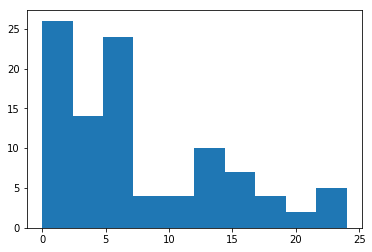

In [3]:
from Process import StickBreakingProcess
import matplotlib.pyplot as plt
dp = StickBreakingProcess(alpha=10)
sample = dp.sample(100)
plt.hist(sample)
plt.show()

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import scipy as sp
import seaborn as sns
from theano import tensor as tt
import pandas as pd

In [ ]:
SEED = 5132290 # from random.org

np.random.seed(SEED)
old_faithful_df = pd.read_csv(pm.get_data('old_faithful.csv'))
old_faithful_df['std_waiting'] = (old_faithful_df.waiting - old_faithful_df.waiting.mean()) / old_faithful_df.waiting.std()

N = old_faithful_df.shape[0]

K = 30

def stick_breaking(beta):
    portion_remaining = tt.concatenate([[1], tt.extra_ops.cumprod(1 - beta)[:-1]])

    return beta * portion_remaining

with pm.Model() as model:
    alpha = pm.Gamma('alpha', 1., 1.)
    beta = pm.Beta('beta', 1., alpha, shape=K)
    w = pm.Deterministic('w', stick_breaking(beta))

    tau = pm.Gamma('tau', 1., 1., shape=K)
    lambda_ = pm.Uniform('lambda', 0, 5, shape=K)
    mu = pm.Normal('mu', 0, tau=lambda_ * tau, shape=K)
    obs = pm.NormalMixture('obs', w, mu, tau=lambda_ * tau,
                           observed=old_faithful_df.std_waiting.values)

with model:
    trace = pm.sample(1000, random_seed=SEED)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, lambda_interval__, tau_log__, beta_logodds__, alpha_log__]
